In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from bintrees import BinaryTree
from tqdm.notebook import tqdm_notebook

from common import VoterData, Oracle
from solver import F_ERROR, MAX_F, MIN_F, option1_find_f, option2_find_f
from elicit import ElectoralElicitation

In [3]:
np.random.seed(7)

In [10]:
# interactive
ee = ElectoralElicitation(2)
while not ee.converged():
    vd = ee.generate_trial()
    print("\nVOTER DATA:\n", vd)
    resp = None
    while resp not in ["True", "False", "T", "F"]:
        resp = input("Enter True if dems should win, otherwise False:\n")
    if resp in ["True", "T"]:
        resp = True
    else:
        resp = False
    ee.process_trial(vd, resp)


VOTER DATA:
 VoterData(ns=5, stop=[50000000.0, 21000000.0, 5000000.0, 16000000.0, 19000000.0], stoh=[50, 21, 5, 16, 19], stodv=[0.5530853257940523, 0.41383136683162675, 0.48906740879459176, 0.4128081517633241, 0.5413090893368322])
Enter True if dems should win, otherwise False:
True

VOTER DATA:
 VoterData(ns=5, stop=[2000000.0, 50000000.0, 46000000.0, 50000000.0, 29000000.0], stoh=[2, 50, 46, 50, 29], stodv=[0.47046332851143385, 0.5200027920123391, 0.4605935419848526, 0.5584178308612568, 0.4313800210894756])
Enter True if dems should win, otherwise False:
True

VOTER DATA:
 VoterData(ns=5, stop=[8000000.0, 15000000.0, 2000000.0, 38000000.0, 46000000.0], stoh=[8, 15, 2, 38, 46], stodv=[0.47698861830939454, 0.3518332826621682, 0.4045687924104201, 0.5723054621888519, 0.4988771997394628])
Enter True if dems should win, otherwise False:
True

VOTER DATA:
 VoterData(ns=5, stop=[15000000.0, 1000000.0, 42000000.0, 49000000.0, 25000000.0], stoh=[15, 1, 42, 49, 25], stodv=[0.43274148188059575,

In [11]:
o1e.predict_f()

0.10107626213967635

In [8]:
np.random.seed(7)
ns = 50

o_acc = []
f_errs = []
for i in tqdm_notebook(range(100)):
    opt = np.random.randint(1, 3)
    f = np.random.uniform(MIN_F, MAX_F)
    o = Oracle(option=opt, fairness=f)
    
    ee = ElectoralElicitation(ns)
    while not ee.converged():
        vd = ee.generate_trial()
        dwins = o.should_dwin(vd)
        if ee.process_trial(vd, dwins) != F_ERROR.none:
            raise ValueError()
    
    opt_hat = ee.predict_opt()
    f_hat = ee.predict_f()
    
    o_acc.append(opt_hat == opt)
    err = np.abs(f_hat - f)
    f_errs.append(err)

In [7]:
np.mean(o_acc)

1.0

(array([15., 11., 13.,  9.,  8., 11.,  8., 10.,  9.,  6.]),
 array([0.00040979, 0.00669006, 0.01297034, 0.01925061, 0.02553088,
        0.03181115, 0.03809142, 0.04437169, 0.05065196, 0.05693223,
        0.0632125 ]),
 <a list of 10 Patch objects>)

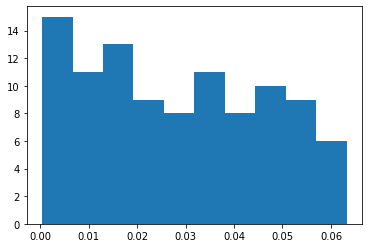

In [6]:
# should always be < CONVERGE_F / 2
plt.hist(f_errs)